# Reinforcement Learning

https://github.com/ageron/handson-ml2


## Setup

 MatplotLib가 그림을 인라인으로 플롯하고 그림을 저장하는 기능

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    !apt update && apt install -y libpq-dev libsdl2-dev swig xorg-dev xvfb
    !pip install -q -U tf-agents-nightly pyvirtualdisplay gym[atari]
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [9,279 B]
Get:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubu

##  OpenAI gym

[OpenAI gym](https://gym.openai.com/)을 사용하여 강화학습 알고리즘 개발  
에이전트가 상호작용할 수 있는 다양한 시뮬레이션 제공

In [ ]:
import gym

In [ ]:
# 사용가능한 모든 시뮬레이션 환경 확인
gym.envs.registry.all()

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

###  Cart-Pole 
카트위에 수직으로 세워진 막대가 넘어지지 않도록 왼쪽, 오른쪽으로 가속할 수 있는 시뮬레이션

In [ ]:
#Cart-Pole 환경을 생성
env = gym.make('CartPole-v1')

In [ ]:
#환경을 초기화
env.seed(42)
obs = env.reset()  
#반환된 관찰(Observations) 확인, [ horizontal position, velocity, angle of the pole (0 = vertical), angular velocity]
print (obs)

[-0.01258566 -0.00156614  0.04207708 -0.00180545]


In [ ]:
try:
    import pyvirtualdisplay
    display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()
except ImportError:
    pass

In [ ]:
 # 환경을 시각화
env.render()

True

In [ ]:
#화면에 랜더링된 환경 이미지를 배열로 반환
img = env.render(mode="rgb_array")
img.shape

(400, 600, 3)

In [ ]:
#랜더링 이미지를 출력
def plot_environment(env, figsize=(5,4)):
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    return img

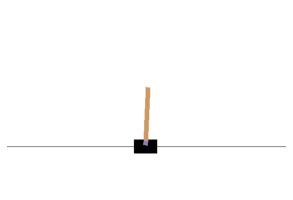

In [ ]:
plot_environment(env)
plt.show()

In [ ]:
#에이전트는 액션공간으로부터 액션을 선택하여 환경과 상호작용
#action_space : 가능한 행동
env.action_space

# Discrete(2) : 두개의 액션만 가능, 왼쪽가속 0, 오른쪽 가속 1

Discrete(2)

In [ ]:
#obs[2] > 0, 막대가 오른쪽으로 기울어져 있으니 카트를 왼쪽 방향으로 가속(action=1)
action = 1  # accelerate right
obs, reward, done, info = env.step(action)
obs

array([-0.01261699,  0.19292789,  0.04204097, -0.28092127])

카트가 오른쪽으로 향하며 이동(`obs[1] > 0`). 막대는 아직 오른쪽 (`obs[2] > 0`), 그러나 각도는 음수 (`obs[3] < 0`) 이므로 다음 단계에서 왼쪽으로 기울어짐

Saving figure cart_pole_plot


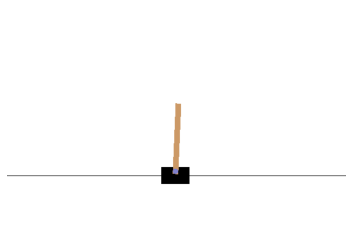

In [ ]:
#환경을 그리고 그림 저장
plot_environment(env)
save_fig("cart_pole_plot")

In [ ]:
#보상 확인
reward

1.0

In [ ]:
#게임이 종료되면 true를 done에는 반환
done

False

In [ ]:
#학습이나 디버깅 정보
info

{}

In [ ]:
#게임지 종료되는 순간까지를  에피소드라 부름(done 이 true가되어 환경이 재설정될때) 
if done:
    obs = env.reset()

### Frame Animation
에피소드 한번을 애니메이션으로 시각화

In [ ]:
env.seed(42)

#기울기로 액션을 결정하는 함수
def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1
    
frames = []

obs = env.reset()
for step in range(200):
    img = env.render(mode="rgb_array")
    frames.append(img)
    action = basic_policy(obs)

    obs, reward, done, info = env.step(action)
    if done:
        break

In [ ]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [ ]:
print("frame size=", len(frames))
plot_animation(frames)

frame size= 55


# Markov Chains
상태 전이가 전이확률에 따라 결정되는 마르코프 모델

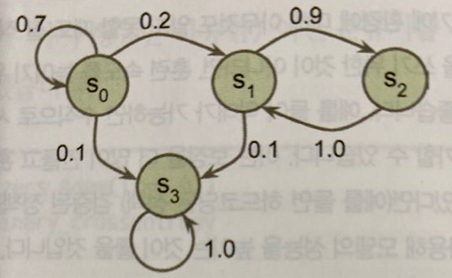

In [ ]:
np.random.seed(42)

transition_probabilities = [ # shape=[s, s']
        [0.7, 0.2, 0.0, 0.1],  # from s0 to s0, s1, s2, s3
        [0.0, 0.0, 0.9, 0.1],  # from s1 to ...
        [0.0, 1.0, 0.0, 0.0],  # from s2 to ...
        [0.0, 0.0, 0.0, 1.0]]  # from s3 to ...

n_max_steps = 50

def print_sequence():
    current_state = 0
    print("States:", end=" ")
    for step in range(n_max_steps):
        print(current_state, end=" ")
        if current_state == 3:
            break
        current_state = np.random.choice(range(4), p=transition_probabilities[current_state]) #0-3숫자중 p확률만큼으로 선택
    else:
        print("...", end="")
    print()

for _ in range(10):
    print_sequence()

States: 0 0 3 
States: 0 1 2 1 2 1 2 1 2 1 3 
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
States: 0 3 
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
States: 0 1 3 
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 ...
States: 0 0 3 
States: 0 0 0 1 2 1 2 1 3 
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 


# Markov Decision Process

* 상태전이 확률(transition probabilities), 보상(rewards) 및 가능한 행동(possible actions)을 정의  
 - 상태 s0에서 작업 a0을 선택한 경우 proba 0.7을 사용하면 보상 +10으로 상태 s0으로 이동, 확률 0.3을 사용하면 보상없이 상태 s1로 이동, 상태 s2로는 이동하지 않는경우
 - 전이 확률: [0.7, 0.3, 0.0] 보상: [+10, 0, 0])

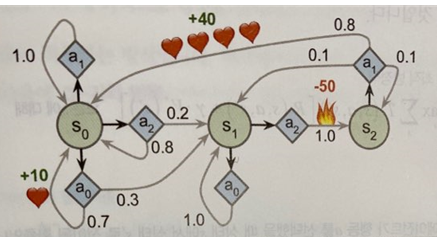

In [ ]:
transition_probabilities = [ # shape=[s, a, s']
        [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],
        [[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]],
        [None, [0.8, 0.1, 0.1], None]]
rewards = [ # shape=[s, a, s']
        [[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
        [[0, 0, 0], [+40, 0, 0], [0, 0, 0]]]
possible_actions = [[0, 1, 2], [0, 2], [1]]

# Q-Value Iteration
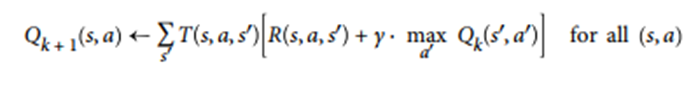

In [ ]:
#Q-value : 상태 s에 대한 행동 a를 취했을 경우에 대한 누적보상치(rewards sum)의 기대값
Q_values = np.full((3, 3), -np.inf) # -np.inf for impossible actions
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.0  # for all possible actions
print(Q_values)    

[[  0.   0.   0.]
 [  0. -inf   0.]
 [-inf   0. -inf]]


### discount factor :  0.9

In [ ]:
gamma = 0.90  # the discount factor

history1 = [] # Not shown in the book (for the figure below)
for iteration in range(50):
    Q_prev = Q_values.copy()
    history1.append(Q_prev) # Not shown
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum([
                    transition_probabilities[s][a][sp]
                    * (rewards[s][a][sp] + gamma * np.max(Q_prev[sp]))
                for sp in range(3)])

history1 = np.array(history1) # Not shown

In [ ]:
Q_values

array([[18.91891892, 17.02702702, 13.62162162],
       [ 0.        ,        -inf, -4.87971488],
       [       -inf, 50.13365013,        -inf]])

In [ ]:
np.argmax(Q_values, axis=1)

array([0, 0, 1])

==> 할인 계수 0.90을 사용할 때, 이 MDP에 대한 최적의 정책은 상태 s0에있을 때 행동 a0을 선택하고 상태 s1에있을 때 행동 a0을 선택하고 상태 s2에있을 때 행동 a1 (가능한 유일한 행동)을 선택

###  discount factor :0.95

In [ ]:
Q_values = np.full((3, 3), -np.inf) # -np.inf for impossible actions
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.0  # for all possible actions

In [ ]:
gamma = 0.95  # the discount factor

for iteration in range(50):
    Q_prev = Q_values.copy()
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum([
                    transition_probabilities[s][a][sp]
                    * (rewards[s][a][sp] + gamma * np.max(Q_prev[sp]))
                for sp in range(3)])

In [ ]:
Q_values

array([[21.73304188, 20.63807938, 16.70138772],
       [ 0.95462106,        -inf,  1.01361207],
       [       -inf, 53.70728682,        -inf]])

In [ ]:
np.argmax(Q_values, axis=1)

array([0, 2, 1])

==> 상태 s1에서  행동 A2 선택  
할인 요소가 더 커지면 에이전트가 미래를 더 중요하게 생각하기 때문에 더 많은 미래 보상을 얻기 위한 패널티 처리로 정책이 변경됨

# Q-Learning

Q-Learning : 점차적으로 Q-value 추정치를 개선하여 동작  

In [ ]:
#상태와 행위에 대한 새로운 상태와 보상 반환 함수
def step(state, action):
    probas = transition_probabilities[state][action]
    next_state = np.random.choice([0, 1, 2], p=probas)
    reward = rewards[state][action][next_state]
    return next_state, reward

In [ ]:
#임의의 정책 정의
def exploration_policy(state):
    return np.random.choice(possible_actions[state])

Q-Values 초기화 , Q-Learning algorithm 실행

In [ ]:
np.random.seed(42)

Q_values = np.full((3, 3), -np.inf)
for state, actions in enumerate(possible_actions):
    Q_values[state][actions] = 0

alpha0 = 0.05 # initial learning rate
decay = 0.005 # learning rate decay
gamma = 0.90 # discount factor
state = 0 # initial state
history2 = [] # Not shown in the book

for iteration in range(10000):
    history2.append(Q_values.copy()) # Not shown
    action = exploration_policy(state)
    next_state, reward = step(state, action)
    next_value = np.max(Q_values[next_state]) # greedy policy at the next step
    alpha = alpha0 / (1 + iteration * decay)  #학습률 감쇠작업
    Q_values[state, action] *= 1 - alpha
    Q_values[state, action] += alpha * (reward + gamma * next_value)
    state = next_state

history2 = np.array(history2) # Not shown

In [ ]:
Q_values

array([[18.77621289, 17.2238872 , 13.74543343],
       [ 0.        ,        -inf, -8.00485647],
       [       -inf, 49.40208921,        -inf]])

In [ ]:
np.argmax(Q_values, axis=1) # optimal action for each state

array([0, 0, 1])

18.918918916135468
Saving figure q_value_plot


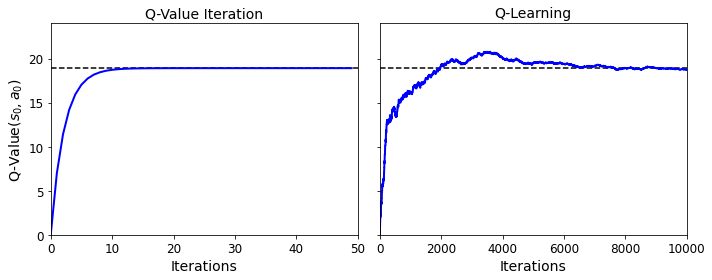

In [ ]:
true_Q_value = history1[-1, 0, 0]
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
axes[0].set_ylabel("Q-Value$(s_0, a_0)$", fontsize=14)
axes[0].set_title("Q-Value Iteration", fontsize=14)
axes[1].set_title("Q-Learning", fontsize=14)
for ax, width, history in zip(axes, (50, 10000), (history1, history2)):
    ax.plot([0, width], [true_Q_value, true_Q_value], "k--")
    ax.plot(np.arange(width), history[:, 0, 0], "b-", linewidth=2)
    ax.set_xlabel("Iterations", fontsize=14)
    ax.axis([0, width, 0, 24])

save_fig("q_value_plot")

# Deep Q-Network

DQN을 이용하여 CartPole 시뮬레이션  
상태-행동 쌍을 입력받고 근사 Q-value를 출력하는 신경망


In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

env = gym.make("CartPole-v1")
input_shape = [4] # == env.observation_space.shape
n_outputs = 2 # == env.action_space.n

model = keras.models.Sequential([
    keras.layers.Dense(32, activation="elu", input_shape=input_shape),
    keras.layers.Dense(32, activation="elu"),
    keras.layers.Dense(n_outputs)
])

DQN을 사용하여 하나의 행위를 선택하기 위해 예측된 Q값이 가장 큰것을 선택   
에이전트가 환경을 탐색하기 위해 확률 `epsilon`을 이용하여 랜덤행동을 선택

In [ ]:
def epsilon_greedy_policy(state, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(2)
    else:
        Q_values = model.predict(state[np.newaxis])
        return np.argmax(Q_values[0])

재생버퍼(replay memory)를 사용하여 에이전트의 모든 경험을 저장하고 학습반복시 배치를 샘플링
(obs, action, reward, next_obs, done)

In [ ]:
from collections import deque

replay_memory = deque(maxlen=2000)

In [ ]:
#재생메모리에서 경험을 샘플링하는 함수, [obs, actions, rewards, next_obs, dones] 반환
def sample_experiences(batch_size):
    indices = np.random.randint(len(replay_memory), size=batch_size)
    batch = [replay_memory[index] for index in indices]
    states, actions, rewards, next_states, dones = [
        np.array([experience[field_index] for experience in batch])
        for field_index in range(5)]
    return states, actions, rewards, next_states, dones

In [ ]:
# DQN을 사용하여 한 단계를 재생하고 재생 메모리에 경험을 기록하는 함수
def play_one_step(env, state, epsilon):
    action = epsilon_greedy_policy(state, epsilon)
    next_state, reward, done, info = env.step(action)
    replay_memory.append((state, action, reward, next_state, done))
    return next_state, reward, done, info

Lastly, let's create a function that will sample some experiences from the replay memory and perform a training step:

**Note**: the first 3 releases of the 2nd edition were missing the `reshape()` operation which converts `target_Q_values` to a column vector (this is required by the `loss_fn()`).

In [ ]:
#재생 메모리에서 일부 경험을 샘플링하고 훈련 단계를 수행하는 함수
batch_size = 32
discount_rate = 0.95
optimizer = keras.optimizers.Adam(lr=1e-3)
loss_fn = keras.losses.mean_squared_error

def training_step(batch_size):
    experiences = sample_experiences(batch_size)  #경험배치를 샘플링 
    states, actions, rewards, next_states, dones = experiences
    next_Q_values = model.predict(next_states)  #다음상태에 대한 가능한 모든 행동에 대한 Q-value얻기
    max_next_Q_values = np.max(next_Q_values, axis=1) #최대 Q-value 얻기
    target_Q_values = (rewards +
                       (1 - dones) * discount_rate * max_next_Q_values) #최대 Q-value로 목표 Q-value 계산
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)  #필요없는 Q-value를 없애기위한 마스크생성
    with tf.GradientTape() as tape:
        all_Q_values = model(states)  #상태값으로 모든 Q-value 얻어오기
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True) #마스크로 필요없는 Q-value를 0로 처리
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values)) #상태-행동쌍에 대한 목표 Q-value와  예측된 Q-value 사이의 손실(평균제곱오차) 계산
    grads = tape.gradient(loss, model.trainable_variables) #기울기 얻어옴
    optimizer.apply_gradients(zip(grads, model.trainable_variables)) #손실을 최소화하는 최적화 알고리즘(경사하강법) 적용

In [ ]:
env.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

rewards = [] 
best_score = 0

In [ ]:
for episode in range(600):
    obs = env.reset()    
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, info = play_one_step(env, obs, epsilon)
        if done:
            break
    rewards.append(step) # Not shown in the book
    if step > best_score: # Not shown
        best_weights = model.get_weights() # Not shown
        best_score = step # Not shown
    print("\rEpisode: {}, Steps: {}, eps: {:.3f}".format(episode, step + 1, epsilon), end="") # Not shown
    if episode > 50:
        training_step(batch_size)

model.set_weights(best_weights)

Episode: 329, Steps: 126, eps: 0.342

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
save_fig("dqn_rewards_plot")
plt.show()

In [ ]:
env.seed(42)
state = env.reset()

frames = []

for step in range(200):
    action = epsilon_greedy_policy(state)
    state, reward, done, info = env.step(action)
    if done:
        break
    img = env.render(mode="rgb_array")
    frames.append(img)
    
plot_animation(frames)